In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt          # plot graphs
%matplotlib inline
import warnings                          #to ignore warnings
warnings.filterwarnings("ignore")

Load the train and test dataset

In [2]:
train=pd.read_csv("/content/train_ctrUa4K.csv")
test=pd.read_csv("/content/test_lAUu6dG.csv")

let make the copy of the data set ,so that if we do some changes in dataset then alse we have a orignal data set 

In [3]:
train_data=train.copy()
test_data=test.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**under stand the data**

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

so test has one columns is missing 'Loan_Status' we will pridict it.

In [7]:
train.dtypes   # printing data type

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

we have seen from above out put that :
there is 3 type of data:
1: object  - object fromat means it has categorical value.
2: int64
3: float64

In [8]:
train.shape , test.shape

((614, 13), (367, 12))

we have seen from above code that train set as 614 rows and 13 columns while in test data set 367 rows and 12 columns

# **univariant analysis**

In [9]:
train['Loan_Status'].value_counts()       #Target variabe

Y    422
N    192
Name: Loan_Status, dtype: int64

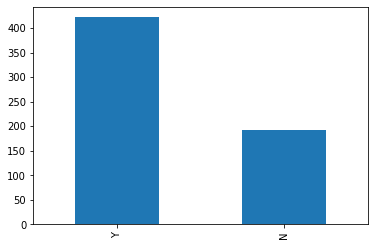

In [10]:
train['Loan_Status'].value_counts().plot.bar()

Loan of around 422 people are approved while 192 disapproved 

Independent variable(categorical)

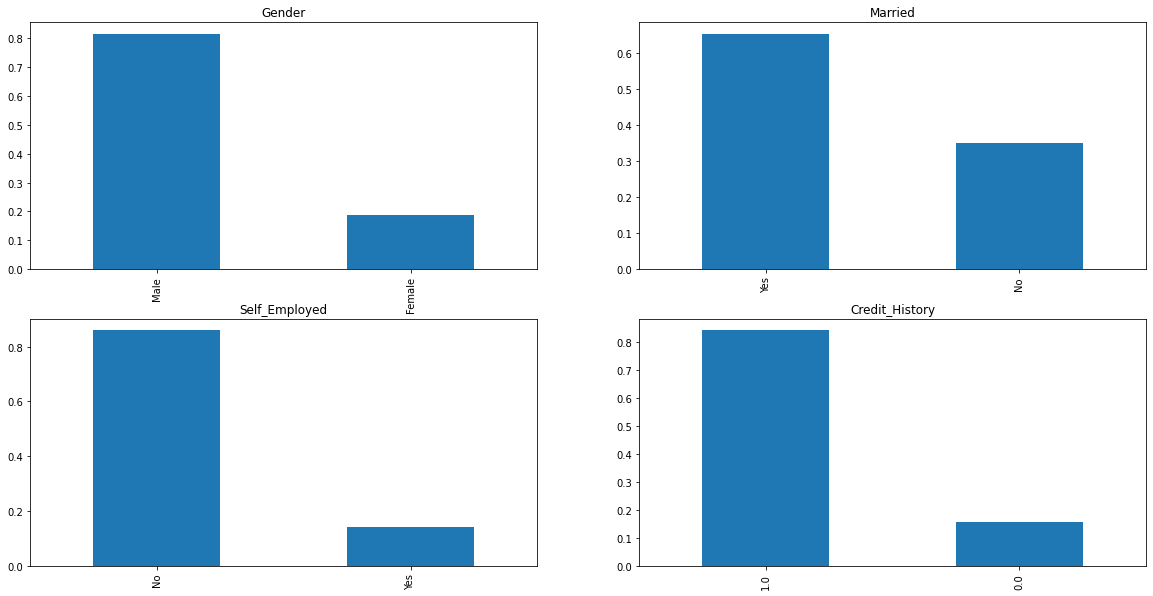

In [11]:
plt.figure(1) 
plt.subplot(221)   
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')

1: 80% people are male rest 20% are female 
2: 15% people are self_emplyed 
3: around 65% are married.
4: around 80% repay their debit.

**Independent variable(ordinal)**

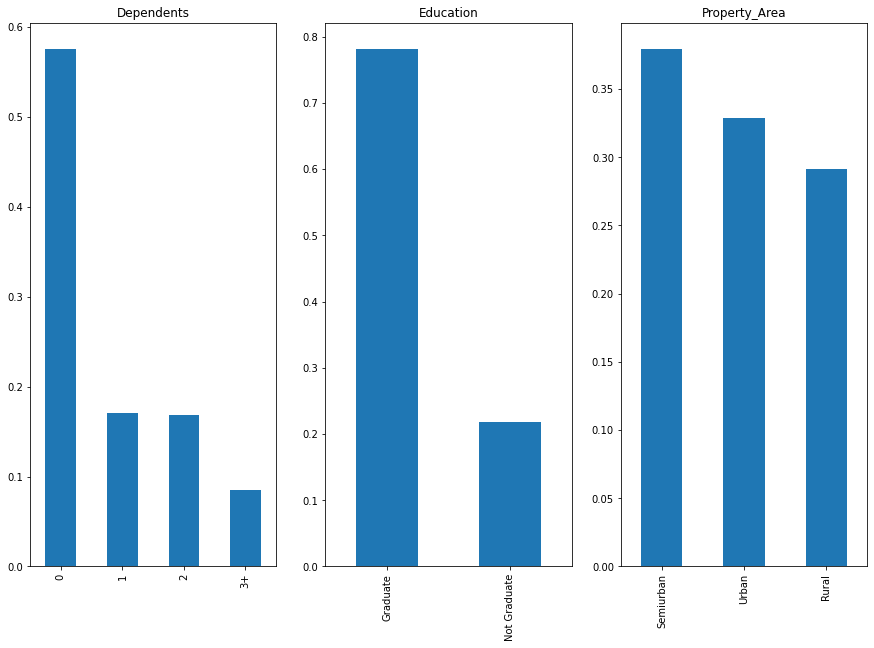

In [12]:
plt.figure(1) 
plt.subplot(131)   
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Dependents')
plt.subplot(132)   
train['Education'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Education')
plt.subplot(133)   
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(15,10),title='Property_Area')

1: most of the applicant do'nt have any dependents.
2: 80% applicant are graduate.
3: most of the applicant are from Semiurban area.

**Independent variable (numerical)**

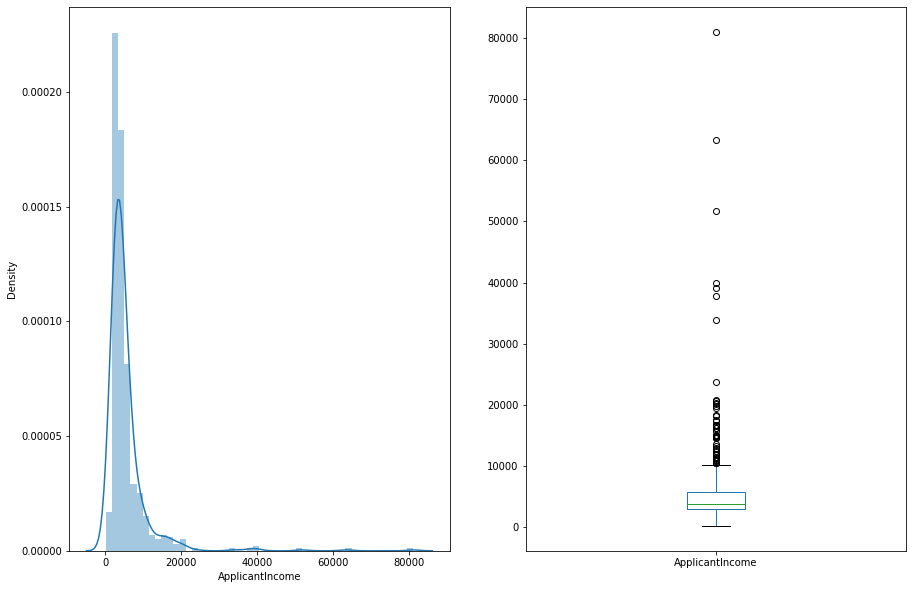

In [13]:
plt.figure(2)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(15,10))

from the above diagrm it is clear that most of the data is shifted towords right , so it is not normally distributed.

> Indented block



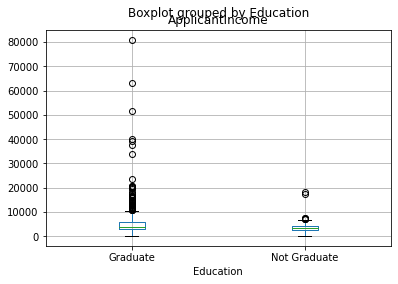

In [14]:
train.boxplot(column='ApplicantIncome', by='Education')

we can see that there is large number of graduate who has large income .they treated as a outliers .

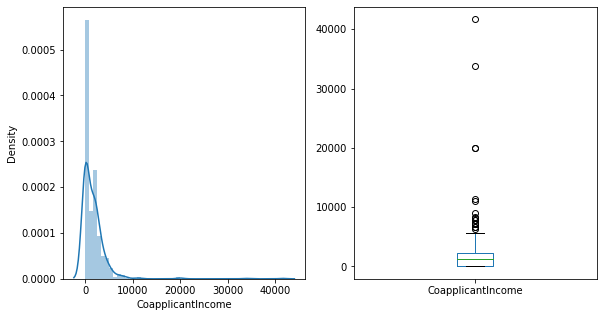

In [15]:
plt.figure(3)
plt.subplot(141)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(142)
train['CoapplicantIncome'].plot.box(figsize=(20,5))

CoapplicantIncome is also not normally distributed .most of the information lie in the range of 0-5000 and has lot of outliers.
 

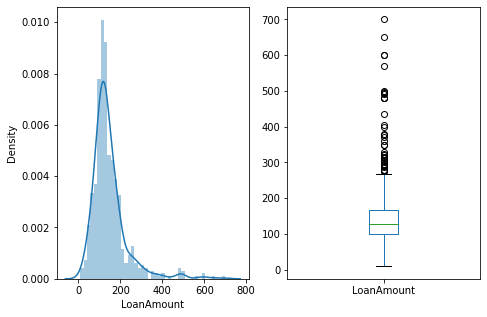

In [16]:
plt.figure(4)
plt.subplot(151)
df=train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(152)
train['LoanAmount'].plot.box(figsize=(20,5))

In [17]:
train['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

Loan Amount data is fairly normally distributed it also has some outlies.

# Bivariant Analysis

**Categorical Vs Target value **

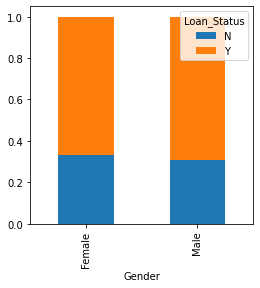

In [18]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

The proportion aprovel of loan is approx same for both male and female .

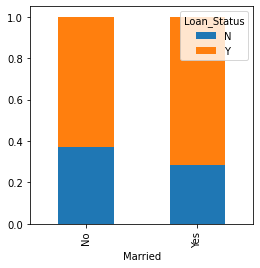

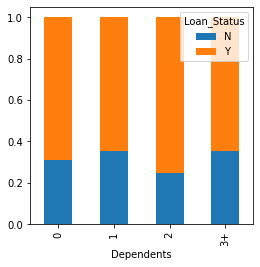

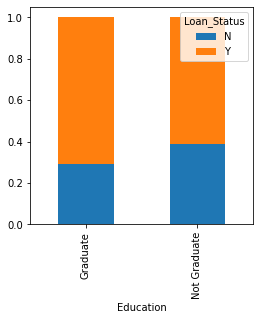

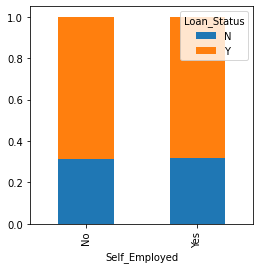

In [19]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))


In [20]:
train['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

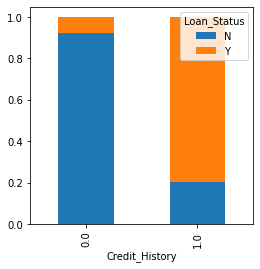

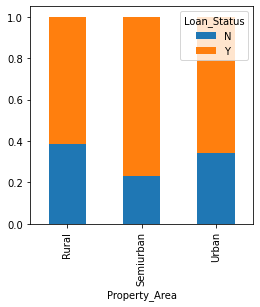

In [21]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

**Numerical variable Vs Traget variable**

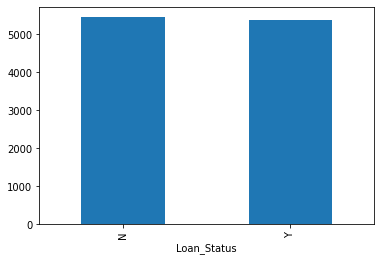

In [22]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [23]:
train['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

here y-axis represent mean  Applicantincome . we do not see any change in mean income . so let's create bins of Applicant Income.

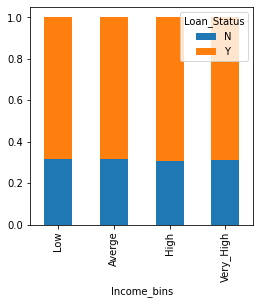

In [24]:
bins=[0,2500,5000,8000,81000]
group=['Low','Averge','High','Very_High']
train['Income_bins']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bins=pd.crosstab(train['Income_bins'],train['Loan_Status'])
Income_bins.div(Income_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

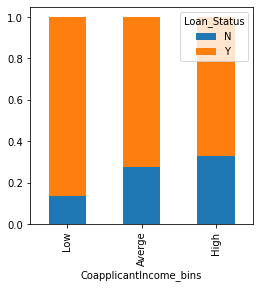

In [25]:
bins=[0,1000,3000,42000]
group=['Low','Averge','High']
train['CoapplicantIncome_bins']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
CoapplicantIncome_bins=pd.crosstab(train['CoapplicantIncome_bins'],train['Loan_Status'])
CoapplicantIncome_bins.div(CoapplicantIncome_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

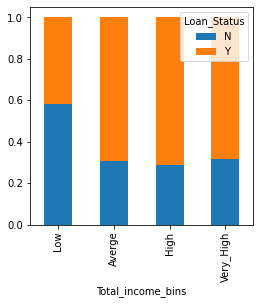

In [26]:
train['Total_income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,5000,8000,81000]
group=['Low','Averge','High','Very_High']
train['Total_income_bins']=pd.cut(train['Total_income'],bins,labels=group)
Total_income_bins=pd.crosstab(train['Total_income_bins'],train['Loan_Status'])
Total_income_bins.div(Total_income_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))


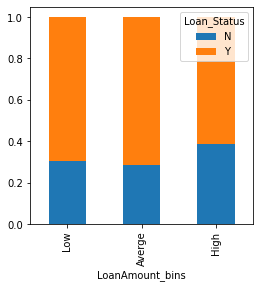

In [27]:
bins=[0,100,200,700]
group=['Low','Averge','High']
train['LoanAmount_bins']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bins=pd.crosstab(train['LoanAmount_bins'],train['Loan_Status'])
LoanAmount_bins.div(LoanAmount_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

In [28]:
train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [29]:
#train=train.drop(['Income_bins','CoapplicantIncome_bins','Total_income','Total_income_bins','LoanAmount_bins'] ,axis=1 )
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [30]:
train['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

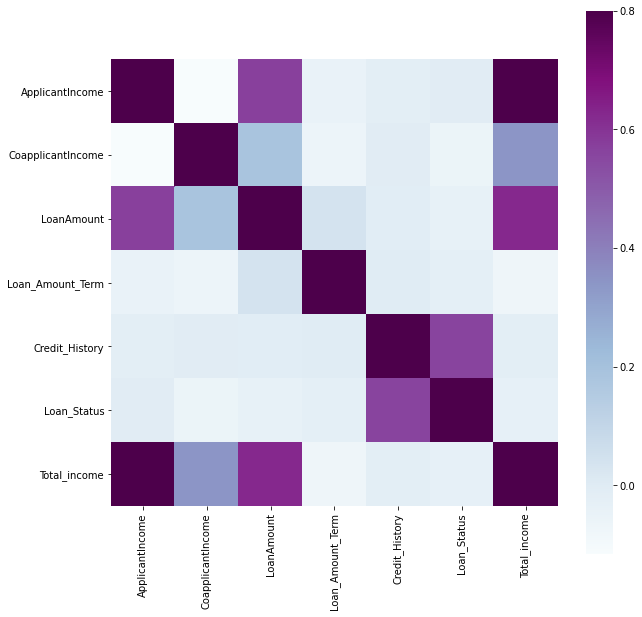

In [31]:
matrix=train.corr() 
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

In [32]:
train=train.drop(['Income_bins','CoapplicantIncome_bins','Total_income','Total_income_bins','LoanAmount_bins'] ,axis=1 )

In [33]:
train.shape

(614, 13)

# Missing value implementation


In [34]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [36]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [37]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [38]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [39]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**outlier treatment** 

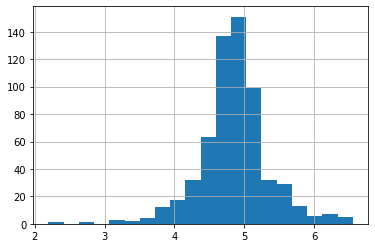

In [40]:
train["LoanAmount_log"]=np.log(train['LoanAmount'])
train["LoanAmount_log"].hist(bins=20)
test["LoanAmount_log"]=np.log(train['LoanAmount'])

In [41]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [42]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)


In [43]:
X=train.drop('Loan_Status',axis=1)
y=train.Loan_Status



In [44]:
X=pd.get_dummies(X)

train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y ,test_size=0.30,random_state=101)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [47]:
logmodel = LogisticRegression()


In [48]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
pred_cv=logmodel.predict(x_cv)

In [50]:
accuracy_score(y_cv,pred_cv)

0.772972972972973

In [51]:
pred_test=logmodel.predict(test)

In [52]:
submission=pd.read_csv("/content/sample_submission_49d68Cx.csv")

In [53]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_data['Loan_ID']

In [54]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [55]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Final_prediction.csv')

In [58]:
from sklearn.model_selection import StratifiedKFold

In [80]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl=X.loc[train_index],X.loc[test_index]
  ytr,yvl=y[train_index],y[test_index]
  model=LogisticRegression(random_state=1)
  model.fit(xtr,ytr)
  pred_test=model.predict(xvl)
  score =accuracy_score(yvl,pred_test)
  print('accuracy_score',score)
  i+=1
  pred_test=model.predict(test)
  pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


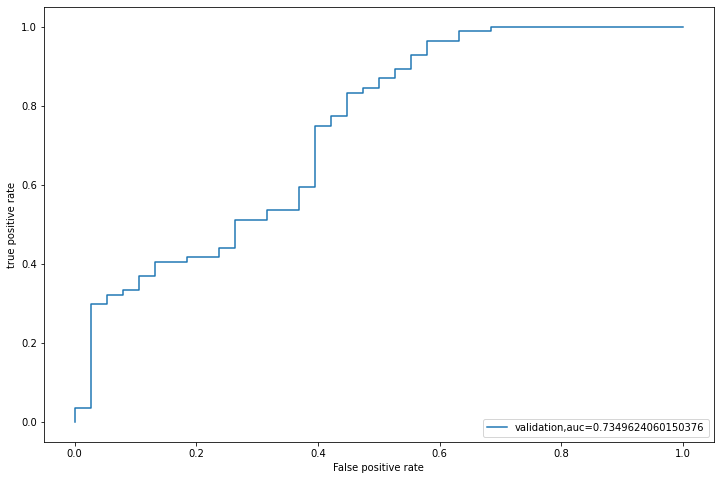

In [83]:
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yvl, pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

In [85]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_data['Loan_ID']


In [86]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [88]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Final_prediction.csv')